In [57]:
import random

from itertools import permutations
from collections.abc import Iterable


City = complex


def distance_points(first, second):
    return abs(first - second)


def distance_tour(tour):
    return sum(distance_points(tour[i - 1], tour[i]) for i in range(1, len(tour)))


def generate_cities(number_of_cities):
    seed = 111
    width = 500
    height = 300
    random.seed(number_of_cities * seed)
    # return frozenset(
    #     City(random.randint(1, width), random.randint(1, height))
    #     for c in range(number_of_cities)
    # )
    ret_cities = set()
    while len(ret_cities) < number_of_cities:
        ret_cities.add(City(random.randint(1, width), random.randint(1, height)))

    return frozenset(ret_cities)

In [50]:
def shortest_tour(tours):
    return min(tours, key=distance_tour)

def brute_force(cities):
    """Generate all possible tours, and select shortest."""
    return shortest_tour(permutations(cities))


In [51]:

import matplotlib.pyplot as plt

def X(city: City):
    return city.real

def Y(city: City):
    return city.imag


def visualize_segment(segment, style='bo-'):
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('off')



def visualize_tour(tour, style='bo-'):
    if len(tour) > 1000:
        plt.figure(figsize=(15, 10))
    start = tour[0:1]
    visualize_segment(tour + start, style)
    visualize_segment(start, 'rD')


In [52]:
from time import perf_counter
from collections import Counter

def tsp(algorithm, cities: Iterable[City]):
    t0 = perf_counter()
    tour = algorithm(cities)
    t1 = perf_counter()
    assert Counter(tour) == Counter(cities)
    visualize_tour(tour)

    print(f"{algorithm.__name__}: {len(tour)} => tour lenght {distance_tour(tour):.0f} in {(t1 - t0):.3f} sec ")

brute_force: 10 => tour lenght 836 in 7.022 sec 


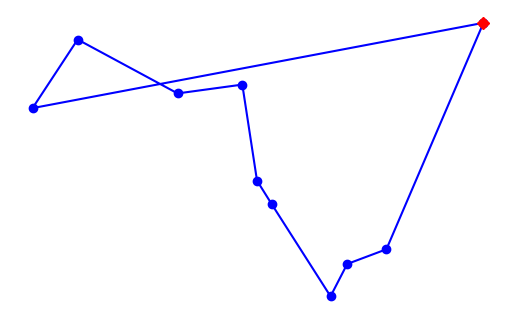

In [58]:
tsp(brute_force, generate_cities(10))

In [59]:

def first(items: Iterable):
    return next(iter(items))

def nearest_neighbor(A: City, cities: Iterable[City]):
    return min(cities, key=lambda c: distance_points(c, A))

def greedy_algorithm(cities: Iterable[City], start: None | City = None):
    current_city = start or first(cities)
    tour = [current_city]
    unvisited = set(cities) - {current_city}
    while unvisited:
        current_city = nearest_neighbor(current_city, unvisited)
        tour.append(current_city)
        unvisited.remove(current_city)
    return tour

greedy_algorithm: 2000 => tour lenght 15243 in 0.461 sec 


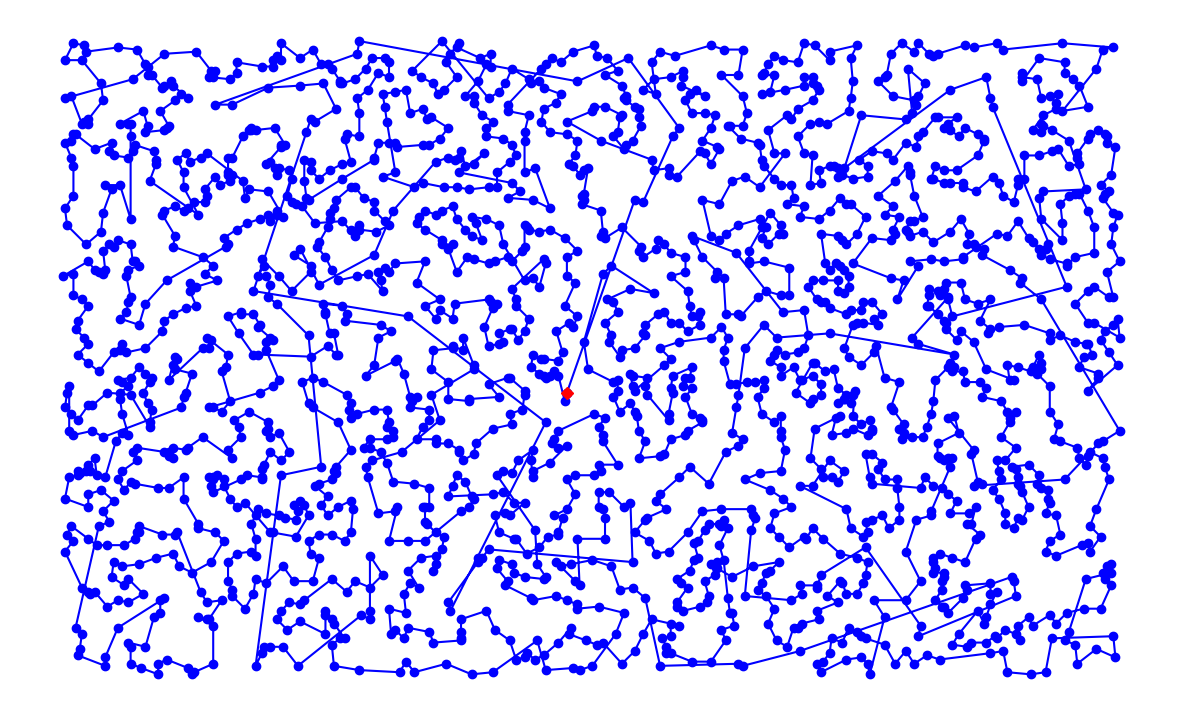

In [60]:
tsp(greedy_algorithm, generate_cities(2000))

greedy_algorithm: 10 => tour lenght 996 in 0.000 sec 


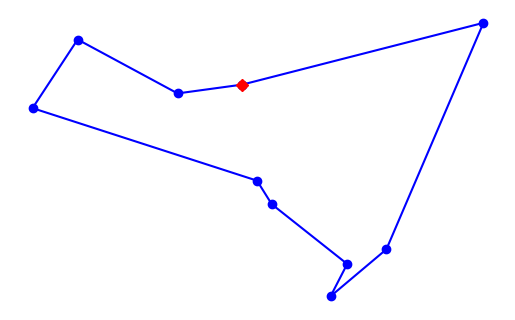

In [61]:
tsp(greedy_algorithm, generate_cities(10))
